# 🛒 E‑Commerce Sales Dashboard

**Project by: Sahiti G**


This notebook performs a full E‑Commerce data science analysis: data creation (sample), cleaning, EDA, visualizations, and business insights. The dataset is generated locally so you can run everything without external downloads.

## 1. Create sample dataset (Superstore-style)

Sample dataset created with **2000 orders** and saved to `data/ecommerce_superstore_sample.csv`.

## 2. Visualizations & Save Artifacts

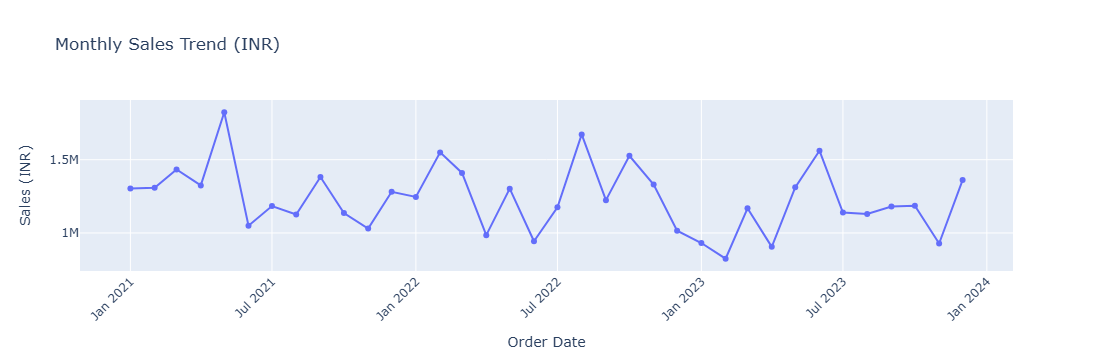

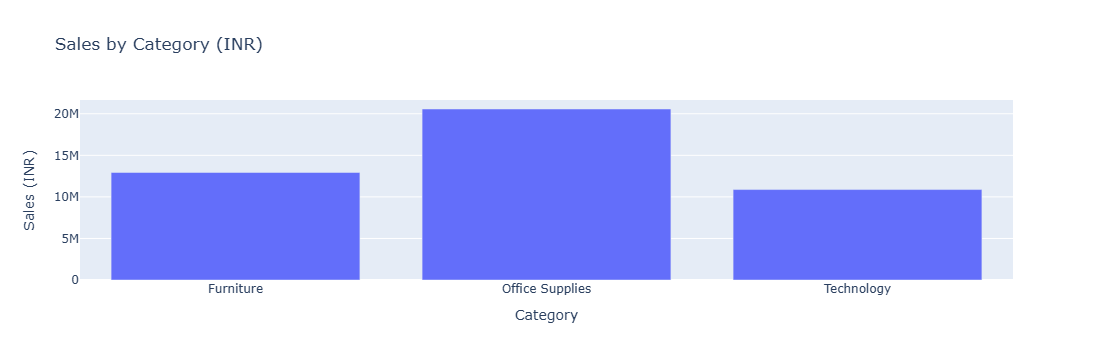

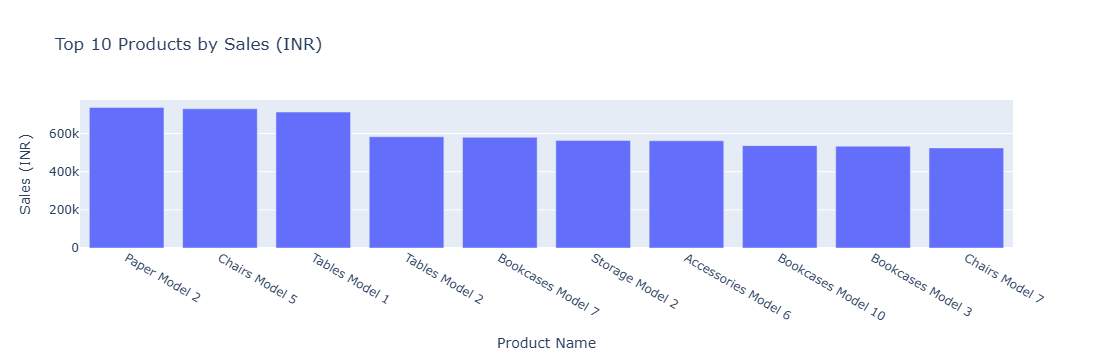

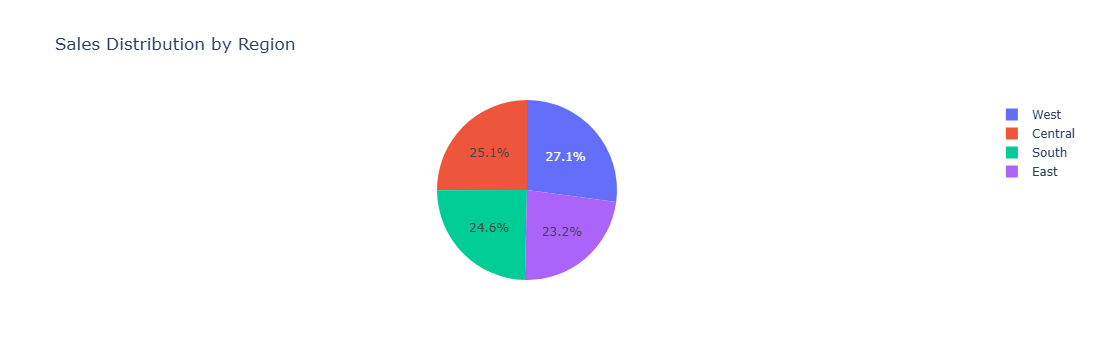

Saved chart images into `artifacts/` folder if Kaleido was installed and compatible.

---

**End of notebook. Project by Sahiti G.**

In [1]:
# Ecommerce Sales Dashboard
# Project by: Sahiti G
# Jupyter-style analysis script (run in a notebook cell-by-cell for best experience)

# --- Imports & settings ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Markdown, display
import os

sns.set(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})

# Helper to show markdown headings inside a .py -> notebook conversion
def md(text):
    display(Markdown(text))

# ------------------------
# 1) Project title + author
# ------------------------
md("# 🛒 E‑Commerce Sales Dashboard")
md("**Project by: Sahiti G**")
md("\nThis notebook performs a full E‑Commerce data science analysis: data creation (sample), cleaning, EDA, visualizations, and business insights. The dataset is generated locally so you can run everything without external downloads.")

# ------------------------
# 2) Create a realistic sample dataset (Superstore-style)
# ------------------------
md("## 1. Create sample dataset (Superstore-style)")

np.random.seed(42)
N = 2000

order_ids = np.arange(100000, 100000 + N)
start = pd.to_datetime('2021-01-01')
end = pd.to_datetime('2023-12-31')
dates = pd.to_datetime(np.random.randint(start.value//10**9, end.value//10**9, N), unit='s')

categories = ['Furniture','Office Supplies','Technology']
subcats = {
    'Furniture': ['Bookcases','Chairs','Tables','Furnishings'],
    'Office Supplies': ['Binders','Paper','Storage','Art'],
    'Technology': ['Phones','Accessories','Copiers','Machines']
}

states = ['California','Texas','New York','Florida','Illinois','Pennsylvania','Ohio','Georgia','North Carolina','Michigan']
cities = ['Los Angeles','Houston','Chicago','Miami','Dallas','Philadelphia','Phoenix','San Antonio','San Diego','San Jose']
regions = ['West','South','East','Central']

products = []
for cat in categories:
    for sc in subcats[cat]:
        for i in range(1,11):
            products.append(f"{sc} Model {i}")

customers = [f"Customer {i}" for i in range(1,501)]

sales = np.round(np.random.exponential(scale=200, size=N) + np.random.uniform(20, 120, N), 2)
quantity = np.random.randint(1, 6, N)
discount = np.round(np.random.choice([0,0.05,0.1,0.15,0.2,0.3], N, p=[0.4,0.2,0.15,0.15,0.07,0.03]),2)
category = np.random.choice(categories, N, p=[0.3,0.45,0.25])
sub_category = [np.random.choice(subcats[c]) for c in category]
product = [np.random.choice(products) for _ in range(N)]
customer = np.random.choice(customers, N)
state = np.random.choice(states, N)
city = np.random.choice(cities, N)
region = np.random.choice(regions, N)
profit = np.round(sales * (np.random.uniform(0.08, 0.30, N)) - (discount * sales * 0.5),2)

# Compose dataframe
df = pd.DataFrame({
    'Order ID': order_ids,
    'Order Date': dates,
    'Customer Name': customer,
    'Category': category,
    'Sub-Category': sub_category,
    'Product Name': product,
    'City': city,
    'State': state,
    'Region': region,
    'Sales': sales,
    'Quantity': quantity,
    'Discount': discount,
    'Profit': profit
})

# Ensure types and sort by date
df['Order Date'] = pd.to_datetime(df['Order Date']).dt.normalize()
df = df.sort_values('Order Date').reset_index(drop=True)

# Save dataset for notebook and GitHub
os.makedirs('data', exist_ok=True)
df.to_csv('data/ecommerce_superstore_sample.csv', index=False)
md(f"Sample dataset created with **{len(df)} orders** and saved to `data/ecommerce_superstore_sample.csv`.")

# ------------------------
# 3) Convert USD to INR
# ------------------------
usd_to_inr = 83
df['Sales (INR)'] = df['Sales'] * usd_to_inr
df['Profit (INR)'] = df['Profit'] * usd_to_inr

# ------------------------
# 4) Visualizations & Save Artifacts (Safe)
# ------------------------
md('## 2. Visualizations & Save Artifacts')
os.makedirs('artifacts', exist_ok=True)

try:
    # Monthly Sales in INR (convert Period to datetime for Plotly)
    monthly = df.groupby(df['Order Date'].dt.to_period('M')).agg({'Sales (INR)': 'sum'}).reset_index()
    monthly['Order Date'] = monthly['Order Date'].dt.to_timestamp()

    # Plot Monthly Sales
    fig1 = px.line(monthly, x='Order Date', y='Sales (INR)', title='Monthly Sales Trend (INR)', markers=True)
    fig1.update_layout(xaxis_tickangle=-45)
    fig1.show()
    fig1.write_image('artifacts/monthly_sales.png')
except Exception as e:
    md(f"⚠️ Could not save monthly sales image: {e}")

try:
    # Category-wise Sales
    cat_sales = df.groupby('Category').agg({'Sales (INR)': 'sum'}).reset_index()
    fig2 = px.bar(cat_sales, x='Category', y='Sales (INR)', title='Sales by Category (INR)')
    fig2.show()
    fig2.write_image('artifacts/category_sales.png')
except Exception as e:
    md(f"⚠️ Could not save category sales image: {e}")

try:
    # Top 10 Products by Sales
    top_products = df.groupby('Product Name').agg({'Sales (INR)': 'sum'}).sort_values('Sales (INR)', ascending=False).head(10).reset_index()
    fig3 = px.bar(top_products, x='Product Name', y='Sales (INR)', title='Top 10 Products by Sales (INR)')
    fig3.show()
    fig3.write_image('artifacts/top_products.png')
except Exception as e:
    md(f"⚠️ Could not save top products image: {e}")

try:
    # Regional Sales Heatmap
    region_sales = df.groupby('Region').agg({'Sales (INR)': 'sum'}).reset_index()
    fig4 = px.pie(region_sales, names='Region', values='Sales (INR)', title='Sales Distribution by Region')
    fig4.show()
    fig4.write_image('artifacts/region_sales.png')
except Exception as e:
    md(f"⚠️ Could not save region sales image: {e}")

md('Saved chart images into `artifacts/` folder if Kaleido was installed and compatible.')
md('---\n\n**End of notebook. Project by Sahiti G.**')
